<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/lesson_13_clustering_agl_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

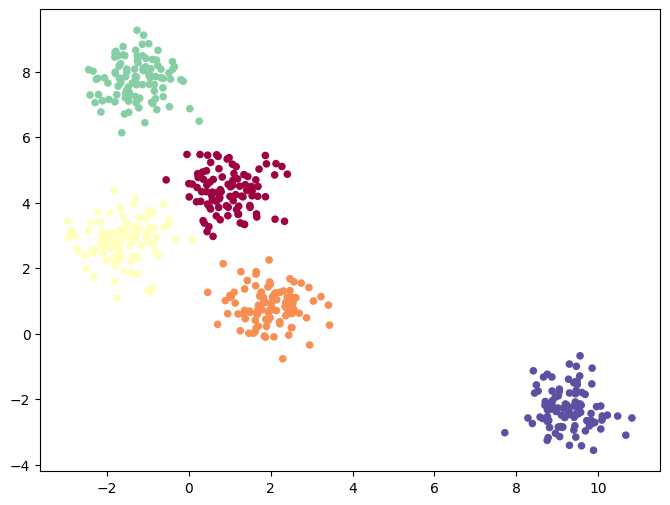

In [3]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5,
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)
plt.show()

In [4]:
def evaluate_clustering(X, labels, method_name):
    if len(set(labels)) > 1 and -1 not in labels:
        score = silhouette_score(X, labels)
        print(f"Silhouette score ({method_name}): {score:.3f}")
    else:
        print(f"Silhouette score ({method_name}): Cannot be computed (only one cluster or noise present)")


Agglomerative Clustering (Complete Linkage)

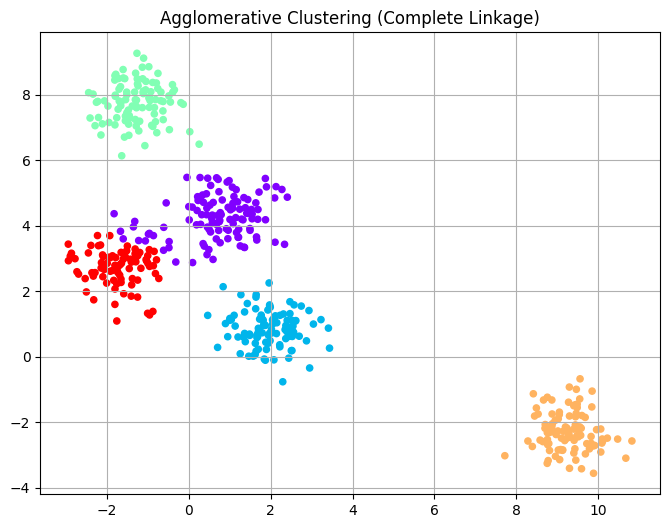

Silhouette score (Agglomerative (Complete)): 0.691


In [5]:
agg_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
labels_complete = agg_complete.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_complete, cmap='rainbow', s=20)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.grid(True)
plt.show()

evaluate_clustering(X, labels_complete, "Agglomerative (Complete)")

Agglomerative Clustering (Single Linkage)

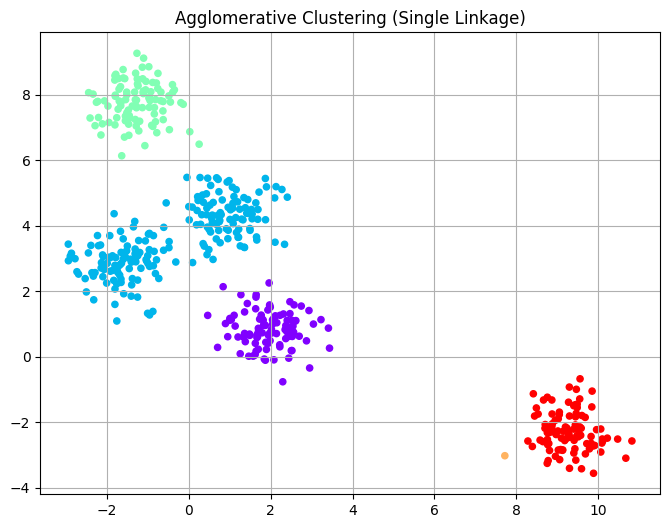

Silhouette score (Agglomerative (Single)): 0.561


In [6]:
agg_single = AgglomerativeClustering(n_clusters=5, linkage='single')
labels_single = agg_single.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_single, cmap='rainbow', s=20)
plt.title("Agglomerative Clustering (Single Linkage)")
plt.grid(True)
plt.show()

evaluate_clustering(X, labels_single, "Agglomerative (Single)")


Dendrogram (Complete Linkage)

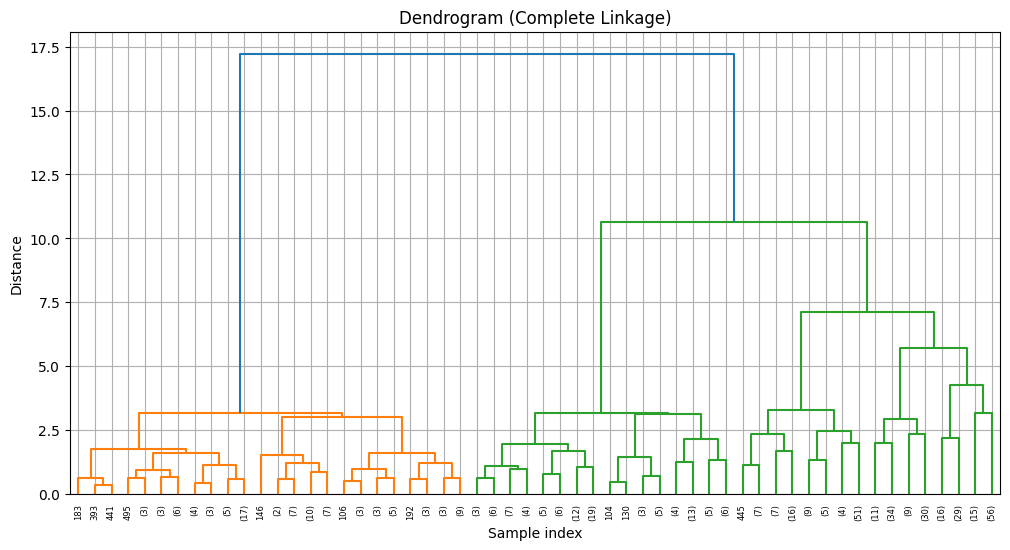

In [7]:
linked = linkage(X, method='complete')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


DBSCAN with Auto eps Selection

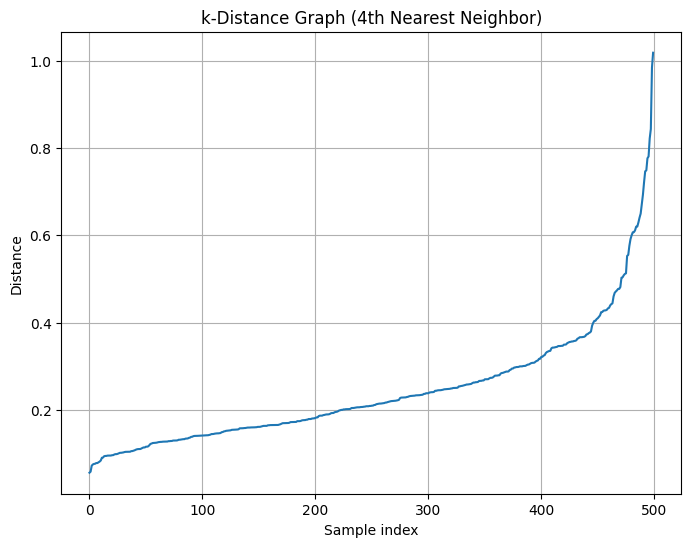

In [8]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, 3])

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("k-Distance Graph (4th Nearest Neighbor)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


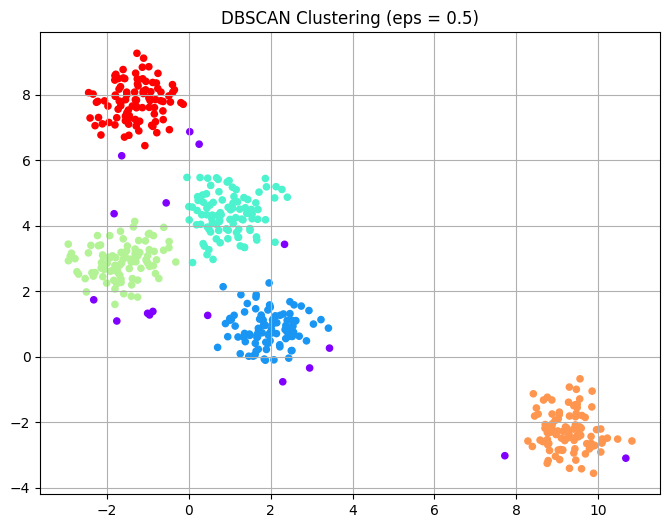

Silhouette score (DBSCAN): Cannot be computed (only one cluster or noise present)


In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='rainbow', s=20)
plt.title("DBSCAN Clustering (eps = 0.5)")
plt.grid(True)
plt.show()

evaluate_clustering(X, labels_dbscan, "DBSCAN")

KMeans: Elbow Method

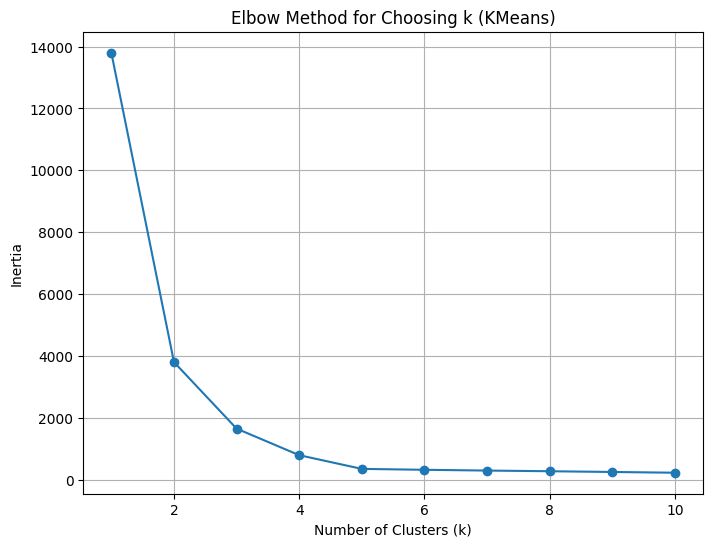

In [10]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Choosing k (KMeans)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


KMeans: Silhouette Score to Choose Optimal k

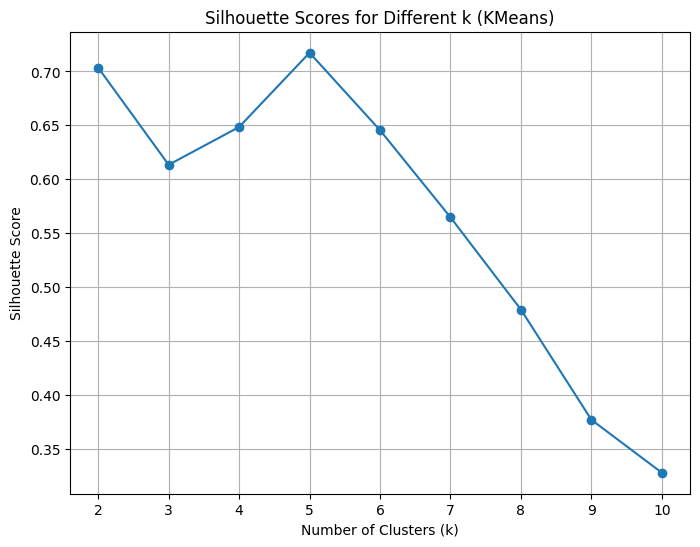

Optimal k according to Silhouette Score: 5


In [11]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_k = np.argmax(silhouette_scores) + 2

plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k (KMeans)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

print(f"Optimal k according to Silhouette Score: {optimal_k}")


Final KMeans Clustering

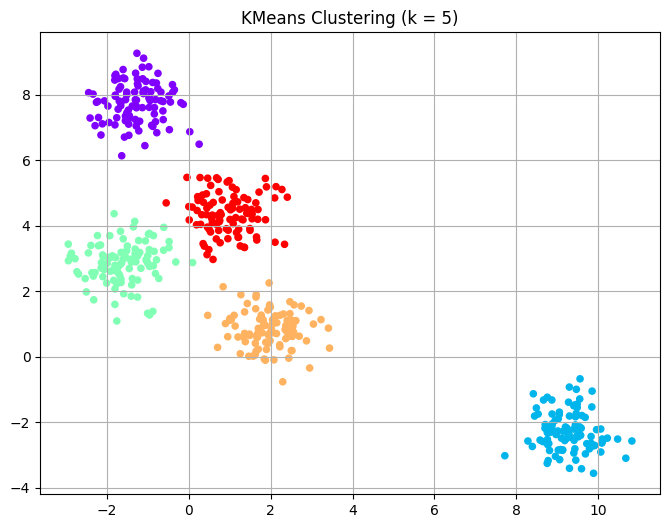

Silhouette score (KMeans (k = 5)): 0.717


In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow', s=20)
plt.title(f"KMeans Clustering (k = {optimal_k})")
plt.grid(True)
plt.show()

evaluate_clustering(X, labels_kmeans, f"KMeans (k = {optimal_k})")
